In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px

c:\Users\ahmad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ahmad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\ahmad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Get the information of data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.columns = df.columns.str.replace('*', '').str.lower()
df.columns

C:\Users\ahmad\AppData\Local\Temp\ipykernel_15412\2575899969.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('*', '').str.lower()


Index(['start_date', 'end_date', 'category', 'start', 'stop', 'miles',
       'purpose'],
      dtype='object')

In [6]:
df.isna().mean()

start_date    0.000000
end_date      0.000865
category      0.000865
start         0.000865
stop          0.000865
miles         0.000000
purpose       0.435121
dtype: float64

In [7]:
df.describe()

,miles
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
df.miles.quantile([0.8,0.9, 0.95, 0.97])

0.80    12.300
0.90    17.100
0.95    28.125
0.97    44.145
Name: miles, dtype: float64

In [9]:
df[df.miles == df.miles.max()].index

Int64Index([1155], dtype='int64')

In [10]:
df.drop(df[df.miles == df.miles.max()].index, inplace=True)

In [11]:
df.describe()

,miles
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [12]:
df.describe(include='object')

,start_date,end_date,category,start,stop,purpose
count,1155,1155,1155,1155,1155,653
unique,1154,1154,2,177,188,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,Meeting
freq,2,2,1078,201,203,187


### Univariate Analysis

In [13]:
df['category'].value_counts()

Business    1078
Personal      77
Name: category, dtype: int64

In [14]:
df['start'].nunique()

177

In [15]:
df['stop'].value_counts()

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: stop, Length: 188, dtype: int64

In [16]:
df['purpose'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: purpose, dtype: int64

In [17]:
df['miles'].nlargest(10)

269    310.3
270    201.0
881    195.9
776    195.6
546    195.3
559    180.2
297    174.2
299    159.3
727    156.9
268    144.0
Name: miles, dtype: float64

### Convert the MILES TO KM

In [18]:
df['km'] = df['miles'] * 1.60934

In [19]:
df.drop('miles',axis=1,inplace = True)

In [20]:
df['km'].value_counts()

15.932466    28
4.988954     26
3.379614     19
16.737136    19
4.828020     19
             ..
75.478046     1
64.695468     1
26.715044     1
31.060262     1
77.570188     1
Name: km, Length: 256, dtype: int64

In [21]:
max_index= df['km'].argmax()

In [22]:
max_index

269

In [23]:
df[df['km'] == df['km'].min()]

,start_date,end_date,category,start,stop,purpose,km
44,1/26/2016 17:27,1/26/2016 17:29,Business,Cary,Cary,Errand/Supplies,0.80467
120,2/17/2016 16:38,2/17/2016 16:43,Business,Katunayaka,Katunayaka,Errand/Supplies,0.80467
420,6/8/2016 17:16,6/8/2016 17:18,Business,Soho,Tribeca,Errand/Supplies,0.80467


In [24]:
df['km'].argmin()

44

In [25]:
px.histogram(df,x='km',nbins=100)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   start_date  1155 non-null   object 
 1   end_date    1155 non-null   object 
 2   category    1155 non-null   object 
 3   start       1155 non-null   object 
 4   stop        1155 non-null   object 
 5   purpose     653 non-null    object 
 6   km          1155 non-null   float64
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [27]:
df.isnull().mean() * 100

start_date     0.000000
end_date       0.000000
category       0.000000
start          0.000000
stop           0.000000
purpose       43.463203
km             0.000000
dtype: float64

## For each purpose for each starting city calculate the sum of kms driven 

In [28]:
df.groupby(['purpose', 'start'])['km'].sum()

purpose          start           
Airport/Travel   Kar?chi               6.598294
                 Unknown Location     19.955816
Between Offices  Berkeley             38.624160
                 Burtrose              7.724832
                 CBD                   3.057746
                                        ...    
Temporary Site   Oakland              15.610598
                 Raleigh              32.508668
                 San Francisco        34.922678
                 Summerwinds          14.001258
                 Unknown Location    268.920714
Name: km, Length: 227, dtype: float64

In [29]:
pd.pivot_table(index = 'purpose' , columns='start',values = 'km', aggfunc='sum' , data = df)

start,Apex,Arabi,Asheville,Austin,Banner Elk,Bellevue,Berkeley,Boone,Briar Meadow,Burtrose,...,Washington Avenue,Waverly Place,Wayne Ridge,West Berkeley,West Palm Beach,West University,Weston,Westpark Place,Whitebridge,Winston Salem
purpose,,,,,,,,,,,,,,,,,,,,,
Airport/Travel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Between Offices,NaN,NaN,NaN,NaN,NaN,NaN,38.624160,NaN,NaN,7.724832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.450922,NaN
Charity ($),NaN,NaN,NaN,NaN,24.301034,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,290.003068,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Visit,43.130312,NaN,NaN,218.87024,NaN,NaN,171.877512,NaN,15.449664,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.852628,NaN
Errand/Supplies,NaN,NaN,NaN,NaN,7.081096,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.656040,44.417784,NaN
Meal/Entertain,29.289988,27.35878,NaN,NaN,NaN,NaN,8.207634,NaN,NaN,NaN,...,NaN,15.610598,25.74944,NaN,6.920162,3.379614,6.115492,9.816974,134.701758,NaN
Meeting,23.496364,NaN,147.737412,NaN,NaN,20.760486,NaN,NaN,NaN,NaN,...,9.977908,10.943512,12.87472,15.932466,11.426314,NaN,NaN,NaN,61.154920,215.007824
Moving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#df.drop('PURPOSE*',axis=1,inplace = True)

### Describe the KM of all trips

In [31]:
df.describe()['km']

count    1155.000000
mean       17.005638
std        34.728118
min         0.804670
25%         4.667086
50%         9.656040
75%        16.737136
max       499.378202
Name: km, dtype: float64

In [32]:
px.histogram(df,x='km',nbins=100)

### Feature Enigneering 

#### Format Data

In [33]:
df['start_date'] = pd.to_datetime(df['start_date'],format ='%m/%d/%Y %H:%M')
df['end_date'] = pd.to_datetime(df['end_date'],format ='%m/%d/%Y %H:%M')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   start_date  1155 non-null   datetime64[ns]
 1   end_date    1155 non-null   datetime64[ns]
 2   category    1155 non-null   object        
 3   start       1155 non-null   object        
 4   stop        1155 non-null   object        
 5   purpose     653 non-null    object        
 6   km          1155 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


#### Get the Duration

In [35]:
duration = df['end_date'] - df['start_date']
duration

0      0 days 00:06:00
1      0 days 00:12:00
2      0 days 00:13:00
3      0 days 00:14:00
4      0 days 01:07:00
             ...      
1150   0 days 00:07:00
1151   0 days 00:18:00
1152   0 days 00:35:00
1153   0 days 00:18:00
1154   0 days 01:43:00
Length: 1155, dtype: timedelta64[ns]

In [36]:
duration.dt.total_seconds() / 60

0         6.0
1        12.0
2        13.0
3        14.0
4        67.0
        ...  
1150      7.0
1151     18.0
1152     35.0
1153     18.0
1154    103.0
Length: 1155, dtype: float64

In [37]:
df['duration'] = (df['end_date']-df['start_date'] ) / np.timedelta64(1,'m')
# df['duration'] = (df['end_date'] - df['start_date']).total_seconds() / 60

In [38]:
df

,start_date,end_date,category,start,stop,purpose,km,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,Meal/Entertain,8.207634,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,NaN,8.046700,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,Errand/Supplies,7.724832,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,Meeting,7.563898,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,Customer Visit,102.514958,67.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,Meeting,1.126538,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,Temporary Site,6.276426,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,Meeting,26.071308,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,Temporary Site,10.299776,18.0


### Get the Speed

In [39]:
df['speed'] = df['km'] / (df['duration'] / 60)

In [40]:
df.describe()['speed']

count    1155.000000
mean             inf
std              NaN
min         6.304357
25%        23.960298
50%        33.796140
75%        45.978530
max              inf
Name: speed, dtype: float64

### Modify the speed

In [41]:
df[df['start_date'] == df['end_date']]

,start_date,end_date,category,start,stop,purpose,km,duration,speed
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,NaN,111.205394,0.0,inf
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,NaN,2.574944,0.0,inf
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,NaN,5.793624,0.0,inf
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,NaN,1.126538,0.0,inf


In [42]:
df[df['speed']==np.inf]

,start_date,end_date,category,start,stop,purpose,km,duration,speed
751,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,NaN,111.205394,0.0,inf
761,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,NaN,2.574944,0.0,inf
798,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,NaN,5.793624,0.0,inf
807,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,NaN,1.126538,0.0,inf


In [43]:
df.drop(df[df['speed']==np.inf].index, axis =0, inplace = True)

In [44]:
df[df['speed']==np.inf]

,start_date,end_date,category,start,stop,purpose,km,duration,speed


In [45]:
df['duration'].describe()

count    1151.000000
mean       23.324066
std        27.331271
min         1.000000
25%        10.000000
50%        17.000000
75%        28.000000
max       336.000000
Name: duration, dtype: float64

In [46]:
px.histogram(df,x='duration',nbins=100)

In [47]:
df[df['km'].between(110,120)]

,start_date,end_date,category,start,stop,purpose,km,duration,speed
880,2016-10-30 13:24:00,2016-10-30 14:37:00,Business,Bryson City,Asheville,NaN,110.078856,73.0,90.475772


In [48]:
df[df['category'].isin(['Business'])]

,start_date,end_date,category,start,stop,purpose,km,duration,speed
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,Meal/Entertain,8.207634,6.0,82.076340
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,NaN,8.046700,12.0,40.233500
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,Errand/Supplies,7.724832,13.0,35.653071
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,Meeting,7.563898,14.0,32.416706
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,Customer Visit,102.514958,67.0,91.804440
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,Meeting,1.126538,7.0,9.656040
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,Temporary Site,6.276426,18.0,20.921420
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,Meeting,26.071308,35.0,44.693671
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,Temporary Site,10.299776,18.0,34.332587


In [49]:
data = df[df.duration == 5]
data

,start_date,end_date,category,start,stop,purpose,km,duration,speed
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,Meeting,11.426314,5.0,137.115768
39,2016-01-21 16:01:00,2016-01-21 16:06:00,Business,Cary,Cary,Meal/Entertain,1.609340,5.0,19.312080
43,2016-01-26 17:17:00,2016-01-26 17:22:00,Business,Cary,Cary,Errand/Supplies,2.253076,5.0,27.036912
118,2016-02-17 15:17:00,2016-02-17 15:22:00,Business,Colombo,Colombo,Meal/Entertain,2.735878,5.0,32.830536
120,2016-02-17 16:38:00,2016-02-17 16:43:00,Business,Katunayaka,Katunayaka,Errand/Supplies,0.804670,5.0,9.656040
130,2016-02-19 11:45:00,2016-02-19 11:50:00,Personal,Islamabad,Islamabad,NaN,1.609340,5.0,19.312080
152,2016-02-21 15:36:00,2016-02-21 15:41:00,Business,Noorpur Shahan,Unknown Location,Meal/Entertain,3.540548,5.0,42.486576
156,2016-02-24 14:30:00,2016-02-24 14:35:00,Business,Whitebridge,Preston,NaN,2.414010,5.0,28.968120
257,2016-03-21 10:21:00,2016-03-21 10:26:00,Personal,Midtown,Downtown,NaN,1.609340,5.0,19.312080
264,2016-03-23 14:37:00,2016-03-23 14:42:00,Personal,Whitebridge,Preston,NaN,2.735878,5.0,32.830536


In [50]:
# data.iloc[4]['duration']
# data.at[4,'duration'] 


In [51]:
df.sort_values('speed',ascending=False)

,start_date,end_date,category,start,stop,purpose,km,duration,speed
786,2016-10-04 12:17:00,2016-10-04 12:18:00,Business,Unknown Location,Unknown Location,NaN,24.301034,1.0,1458.062040
791,2016-10-07 10:56:00,2016-10-07 10:59:00,Business,Unknown Location,Lahore,NaN,53.430088,3.0,1068.601760
789,2016-10-06 18:37:00,2016-10-06 18:39:00,Business,Unknown Location,Unknown Location,NaN,29.611856,2.0,888.355680
788,2016-10-06 17:23:00,2016-10-06 17:40:00,Business,R?walpindi,Unknown Location,NaN,181.211684,17.0,639.570649
804,2016-10-12 19:18:00,2016-10-12 19:21:00,Business,R?walpindi,Unknown Location,NaN,29.611856,3.0,592.237120
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,Meeting,1.126538,7.0,9.656040
775,2016-09-27 19:14:00,2016-09-27 20:34:00,Business,Lahore,Unknown Location,NaN,11.748182,80.0,8.811136
778,2016-09-29 16:13:00,2016-09-29 18:47:00,Business,Unknown Location,Islamabad,NaN,20.277684,154.0,7.900396
769,2016-09-20 20:47:00,2016-09-20 22:47:00,Business,Unknown Location,R?walpindi,NaN,15.449664,120.0,7.724832


### Describe the speed of all trips

In [52]:
df['speed'].describe()

count    1151.000000
mean       43.142701
std        69.488555
min         6.304357
25%        23.938583
50%        33.796140
75%        45.756462
max      1458.062040
Name: speed, dtype: float64

In [53]:
df['km'].describe()

count    1151.000000
mean       16.959871
std        34.670004
min         0.804670
25%         4.667086
50%         9.656040
75%        16.737136
max       499.378202
Name: km, dtype: float64

In [54]:
px.histogram(df,x='speed',nbins=100)

In [55]:
df[df.speed > 120].index

Int64Index([   6,  121,  126,  335,  375,  525,  753,  754,  762,  773,  781,
             786,  788,  789,  791,  799,  804,  933, 1094],
           dtype='int64')

In [56]:
df.drop(df[df.speed > 120].index, axis =0, inplace = True)

In [57]:
px.histogram(df,x='speed',nbins=100)

###  KMS been driven from Fort Pierce to Fort Pierce and how many trips

In [58]:
df[ (df['start'] == 'Fort Pierce') & (df['stop']=='Fort Pierce')].count()['km']

4

In [59]:
df[ (df['start'] == 'Fort Pierce') & (df['stop']=='Fort Pierce')].sum(numeric_only= True)['km']

31.543064

### How many Trips in every start city and visualize the top 10

In [60]:
df['start'].value_counts()

Cary                201
Unknown Location    135
Morrisville          83
Whitebridge          68
Islamabad            56
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: start, Length: 177, dtype: int64

In [61]:
df['start'].value_counts().nlargest(10)

Cary                201
Unknown Location    135
Morrisville          83
Whitebridge          68
Islamabad            56
Durham               37
Lahore               36
Kar?chi              27
Raleigh              27
Westpark Place       17
Name: start, dtype: int64

In [62]:
top_10_start_cities_indicies = df['start'].value_counts().head(10).index

In [63]:
top_10_start_cities_df = df[df['start'].isin(top_10_start_cities_indicies)]

<Axes: xlabel='count', ylabel='start'>

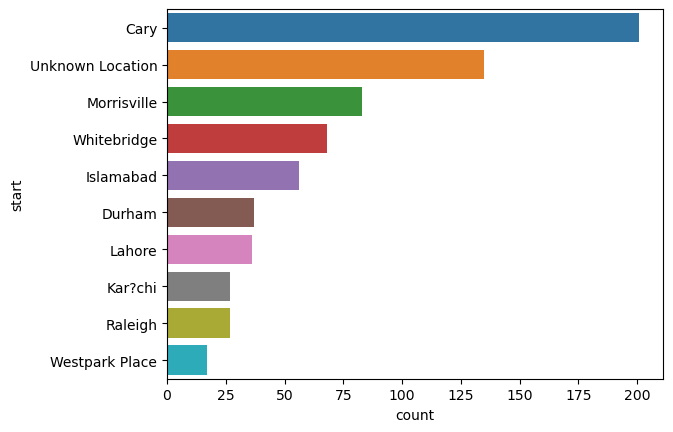

In [64]:
sns.countplot(data = top_10_start_cities_df , y ='start',order=top_10_start_cities_indicies)

### How many trips driven in all Months of year and visualize the top 4 month descening
###  How many trips driven in all days of week
###  How many KMS driven in all period of the day and visualiaze them descending


In [65]:
df['hour'] = df['start_date'].dt.hour
df['month'] =df['start_date'].dt.month_name()
df['day'] = df['start_date'].dt.day_name()

In [66]:
df.head().T

,0,1,2,3,4
start_date,2016-01-01 21:11:00,2016-01-02 01:25:00,2016-01-02 20:25:00,2016-01-05 17:31:00,2016-01-06 14:42:00
end_date,2016-01-01 21:17:00,2016-01-02 01:37:00,2016-01-02 20:38:00,2016-01-05 17:45:00,2016-01-06 15:49:00
category,Business,Business,Business,Business,Business
start,Fort Pierce,Fort Pierce,Fort Pierce,Fort Pierce,Fort Pierce
stop,Fort Pierce,Fort Pierce,Fort Pierce,Fort Pierce,West Palm Beach
purpose,Meal/Entertain,NaN,Errand/Supplies,Meeting,Customer Visit
km,8.207634,8.0467,7.724832,7.563898,102.514958
duration,6.0,12.0,13.0,14.0,67.0
speed,82.07634,40.2335,35.653071,32.416706,91.80444
hour,21,1,20,17,14


In [67]:
def explore(col):
    fig = px.histogram(df,x=col,y='km',title=col)
    fig.show()


In [68]:
explore('hour')

In [69]:
explore('month')

In [70]:
explore('day')

In [71]:
def get_max(col):
    return df.groupby(col).count()['km'].idxmax()

In [72]:
for col in ['hour','month','day']:
    print(f'{col} : {get_max(col)}')

hour : 15
month : December
day : Friday


In [73]:
# Periods
# Hour > Period

# Seasons:
# month > Season

In [74]:
top_month_indicies = df['month'].value_counts().head(4).index

In [75]:
top_month_df = df[df['month'].isin(top_month_indicies)]

In [76]:
top_month_df

,start_date,end_date,category,start,stop,purpose,km,duration,speed,hour,month,day
61,2016-02-01 10:35:00,2016-02-01 11:15:00,Business,Cary,Chapel Hill,Customer Visit,31.221196,40.0,46.831794,10,February,Monday
62,2016-02-01 12:10:00,2016-02-01 12:43:00,Business,Chapel Hill,Cary,Customer Visit,37.497622,33.0,68.177495,12,February,Monday
63,2016-02-01 12:56:00,2016-02-01 13:07:00,Business,Northwoods,Whitebridge,Meal/Entertain,6.276426,11.0,34.235051,12,February,Monday
64,2016-02-02 13:04:00,2016-02-02 13:23:00,Business,Whitebridge,Williamsburg Manor,Meeting,13.357522,19.0,42.181648,13,February,Tuesday
65,2016-02-02 13:51:00,2016-02-02 14:06:00,Business,Cary,Cary,Errand/Supplies,9.656040,15.0,38.624160,13,February,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,Meeting,1.126538,7.0,9.656040,1,December,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,Temporary Site,6.276426,18.0,20.921420,13,December,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,Meeting,26.071308,35.0,44.693671,15,December,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,Temporary Site,10.299776,18.0,34.332587,21,December,Saturday


<Axes: xlabel='month', ylabel='count'>

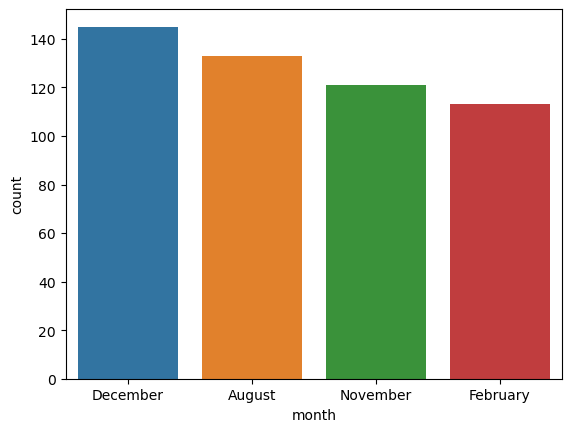

In [77]:
sns.countplot(data = top_month_df , x = 'month' , order = top_month_indicies)

In [78]:
df['day'].value_counts()

Friday       203
Tuesday      173
Monday       173
Saturday     148
Thursday     146
Sunday       145
Wednesday    144
Name: day, dtype: int64

In [79]:
def get_periods(x):
    if x in range(0,13):
        return 'Morning'
    elif x in range(13,19):
        return 'Afternoon'
    elif x in range(19,21):
        return 'Evening'
    else:
        return 'Night'

In [80]:
# df['period']= pd.cut(df['hour'],bins=[0,12,18,20,24],labels=['Morning','Afternoon','Evening','Night'])

In [81]:
df

,start_date,end_date,category,start,stop,purpose,km,duration,speed,hour,month,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,Meal/Entertain,8.207634,6.0,82.076340,21,January,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,NaN,8.046700,12.0,40.233500,1,January,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,Errand/Supplies,7.724832,13.0,35.653071,20,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,Meeting,7.563898,14.0,32.416706,17,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,Customer Visit,102.514958,67.0,91.804440,14,January,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,Meeting,1.126538,7.0,9.656040,1,December,Saturday
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,Temporary Site,6.276426,18.0,20.921420,13,December,Saturday
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,Meeting,26.071308,35.0,44.693671,15,December,Saturday
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,Temporary Site,10.299776,18.0,34.332587,21,December,Saturday


In [82]:
df['periods'] = df['hour'].apply(get_periods)
df

,start_date,end_date,category,start,stop,purpose,km,duration,speed,hour,month,day,periods
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,Meal/Entertain,8.207634,6.0,82.076340,21,January,Friday,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,NaN,8.046700,12.0,40.233500,1,January,Saturday,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,Errand/Supplies,7.724832,13.0,35.653071,20,January,Saturday,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,Meeting,7.563898,14.0,32.416706,17,January,Tuesday,Afternoon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,Customer Visit,102.514958,67.0,91.804440,14,January,Wednesday,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,Meeting,1.126538,7.0,9.656040,1,December,Saturday,Morning
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,Temporary Site,6.276426,18.0,20.921420,13,December,Saturday,Afternoon
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,Meeting,26.071308,35.0,44.693671,15,December,Saturday,Afternoon
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,Temporary Site,10.299776,18.0,34.332587,21,December,Saturday,Night


In [83]:
df.groupby('periods').sum()['km'].sort_values(ascending=False)

periods
Afternoon    9115.462694
Morning      5451.800184
Night        2217.670520
Evening      2140.100332
Name: km, dtype: float64

<Axes: xlabel='periods', ylabel='km'>

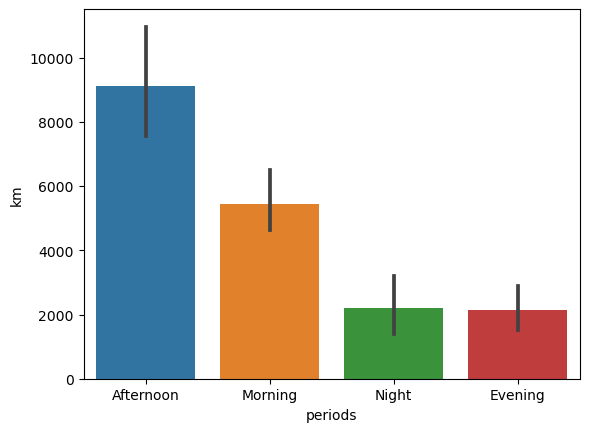

In [84]:
sns.barplot(data = df , x ='periods' , y = 'km',estimator=np.sum,order=df.groupby('periods').sum()['km'].sort_values(ascending=False).index)

In [85]:
df['periods'].value_counts()

Afternoon    545
Morning      342
Evening      138
Night        107
Name: periods, dtype: int64

In [86]:
df.groupby('periods').sum()['speed']

periods
Afternoon    18784.502818
Evening       5184.876484
Morning      13004.943242
Night         4684.923802
Name: speed, dtype: float64

In [87]:
df['speed'].describe()

count    1132.000000
mean       36.801454
std        19.042469
min         6.304357
25%        23.751833
50%        33.404255
75%        45.197619
max       119.493495
Name: speed, dtype: float64

### For each Period for each category which has most driven count

In [88]:
df['dummy'] = 1

In [89]:
pd.pivot_table(data = df , index = 'periods' , columns = 'category',values = 'dummy' , aggfunc='count')

category,Business,Personal
periods,,
Afternoon,513,32
Evening,129,9
Morning,314,28
Night,99,8


In [90]:
def get_season(x):
    if x in ['December','January','February']:
        return 'Winter'
    elif x in ['March','April','May']:
        return 'Spring'
    elif x in ['June','July','August']:
        return 'Summer'
    else:
        return 'Autumn'